In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('pred_data.csv')

In [3]:
df.head()

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [8]:
df.shape

(10100, 3)

In [4]:
# def dumb_model(email):
#     return 0

In [59]:
df['y_pred'] = df['proba'].apply(lambda y_score : 1 if y_score >= 0.50 else 0) # threshold = 0.5

In [104]:
df['y'].value_counts()

0.0    10000
1.0      100
Name: y, dtype: int64

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
cm = confusion_matrix(df['y'], df['y_pred'])
cm

array([[9761,  239],
       [  45,   55]])

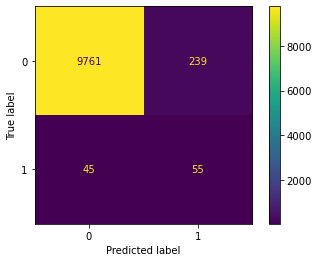

In [63]:
ConfusionMatrixDisplay(cm).plot();

In [64]:
# Accuracy
np.diag(cm).sum()/cm.sum()

0.9718811881188119

In [65]:
# Precision

55/(55+239)

0.1870748299319728

In [66]:
# recall
55/(55+45)

0.55

In [67]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [68]:
p = precision_score(df['y'], df['y_pred'])
p

0.1870748299319728

In [69]:
r = recall_score(df['y'], df['y_pred'])
r

0.55

In [70]:
f1 = 2*p*r/(p+r)
f1

0.2791878172588833

In [71]:
f1_score(df['y'], df['y_pred'])

0.2791878172588833

In [93]:
import matplotlib.pyplot as plt

In [94]:
from sklearn.metrics import roc_curve, roc_auc_score

In [95]:
fpr, tpr, thres = roc_curve(df['y'], df['proba'])

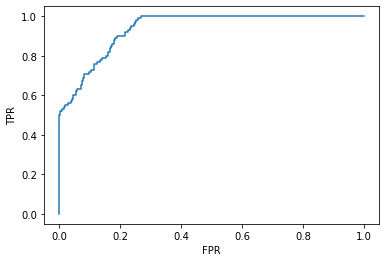

In [98]:
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr, tpr)
plt.show()

In [99]:
roc_auc_score(df['y'], df['proba'])

0.9377570000000001

In [105]:
from sklearn.metrics import precision_recall_curve, auc

In [106]:
pr, re, thres = precision_recall_curve(df['y'], df['proba'])

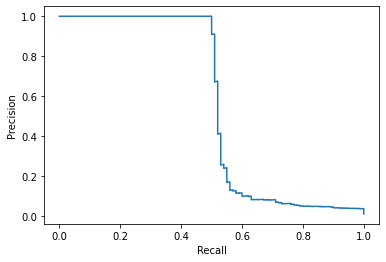

In [107]:
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.plot(re, pr)
plt.show()

In [108]:
auc(re, pr)

0.554765146410734

# Doubts

In [117]:
fpr1, tpr1, thres1 = roc_curve(df['y'], df['proba']/9.6)

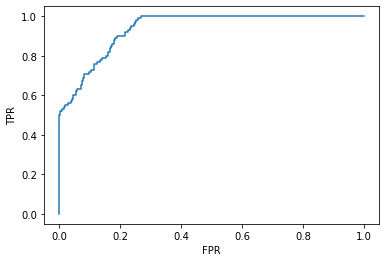

In [118]:
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr1, tpr1)
plt.show()